In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

In [13]:
# Laste poll-of-polls data
url = "https://raw.githubusercontent.com/jensmorten/onesixtynine/main/data/pollofpolls_master.csv"
df = pd.read_csv(url)

In [14]:
# Convert to datetime and set the date to the end of the month
df["Mnd"] = pd.to_datetime(df["Mnd"])

In [15]:
# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)
df.index.to_period('M').to_timestamp('M')

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30'],
              dtype='datetime64[ns]', name='Mnd', length=213, freq='ME')

In [16]:
print(df.index[-5:])  # check last few dates

DatetimeIndex(['2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30'],
              dtype='datetime64[ns]', name='Mnd', freq=None)


In [17]:
df=df[['Ap', 'Hoyre', 'Frp', 'SV', 'SP', 'KrF', 'Venstre', 'MDG', 'Rodt','Andre']]
df.dropna(inplace=True)

In [18]:
lags=3

In [19]:
n_months=12

In [20]:
model = VAR(endog=df)

C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [21]:
model_fitted = model.fit(maxlags=lags,method = 'ols', trend='n', verbose=True)

In [22]:
forecast, forecast_lower, forecast_upper = model_fitted.forecast_interval(model_fitted.endog, steps=n_months)

# --- Create DataFrames for forecast ---
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_months + 1, freq="M")[1:]

forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=df.columns)
forecast_lower_df = pd.DataFrame(forecast_lower, index=forecast_index, columns=df.columns)
forecast_upper_df = pd.DataFrame(forecast_upper, index=forecast_index, columns=df.columns)


C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_31832\14847021.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date, periods=n_months + 1, freq="M")[1:]


In [23]:
forecast_df

,Ap,Hoyre,Frp,SV,SP,KrF,Venstre,MDG,Rodt,Andre
2025-10-31,28.492101,11.605959,20.887361,6.277040,6.512240,4.673874,4.648552,6.378015,5.802616,4.508409
2025-11-30,30.026254,10.724380,20.845422,6.187123,6.452858,4.642285,4.845873,6.672505,5.245698,4.127587
2025-12-31,30.178972,11.132853,20.408529,6.146118,6.966008,4.528282,4.808861,6.933345,4.587674,3.862014
2026-01-31,30.936722,10.780503,20.129256,6.250566,7.156785,4.505768,4.862669,6.980397,4.319032,3.500531
2026-02-28,31.808666,10.274204,20.165622,6.197647,7.312653,4.440211,4.801755,7.005080,4.174975,3.173999
2026-03-31,32.493961,9.905850,20.102331,6.182272,7.511550,4.425353,4.751821,6.980550,4.041410,2.892950
2026-04-30,33.215293,9.552893,19.954629,6.138586,7.682560,4.443940,4.704448,6.930407,3.932615,2.666474
2026-05-31,33.920239,9.201734,19.843781,6.081544,7.862585,4.446085,4.616839,6.869852,3.856749,2.462585
2026-06-30,34.571356,8.858470,19.740125,6.012373,8.041476,4.460693,4.528953,6.809693,3.791352,2.296973
2026-07-31,35.136682,8.559955,19.624988,5.937453,8.229772,4.474870,4.444916,6.761029,3.739238,2.155651


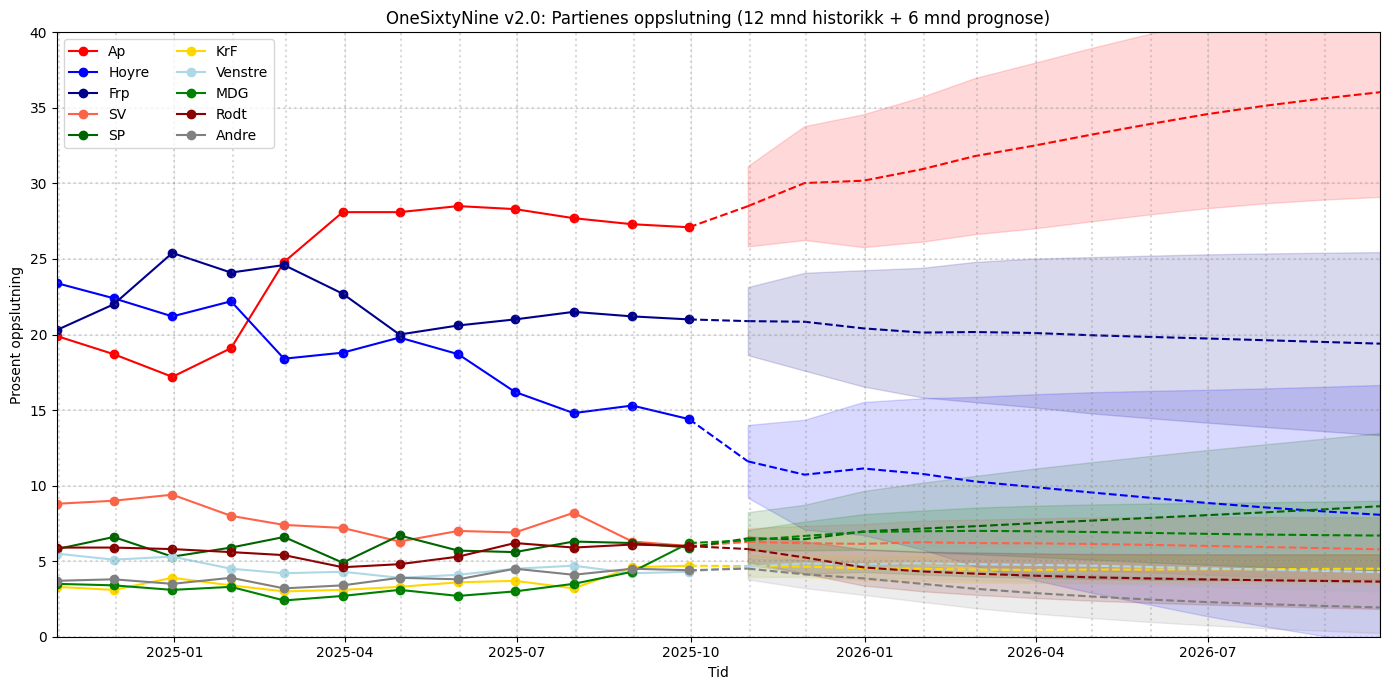

In [24]:
# --- Define colors for consistency ---
colors = {
    'Ap': '#FF0000',        # Red
    'Hoyre': '#0000FF',     # Blue
    'Frp': '#00008B',       # Dark Blue
    'SV': '#FF6347',        # Light Red (Tomato)
    'SP': '#006400',        # Dark Green
    'KrF': '#FFD700',       # Yellow (Gold)
    'Venstre': '#ADD8E6',   # Light Blue
    'MDG': '#008000',       # Green
    'Rodt': '#8B0000',      # Dark Red
    'Andre': '#808080'      # Gray
}

# --- Plot ---
plt.figure(figsize=(14, 7))

months_back = 12
df_recent = df.iloc[-months_back:]  # show only last 12 months of actual data

for party, color in colors.items():
    # Plot actual data (last 12 months)
    plt.plot(df_recent.index, df_recent[party], marker="o", color=color, label=f"{party}")

    # Plot forecasted data
    plt.plot(forecast_df.index, forecast_df[party], linestyle="dashed", color=color)

    # Connect actual to first forecast point (smooth transition)
    last_actual_date = df_recent.index[-1]
    first_forecast_date = forecast_df.index[0]
    last_actual_value = df_recent[party].iloc[-1]
    first_forecast_value = forecast_df[party].iloc[0]

    plt.plot([last_actual_date, first_forecast_date],
             [last_actual_value, first_forecast_value],
             color=color, linestyle="dashed")

    # Plot confidence intervals
    plt.fill_between(
        forecast_df.index,
        forecast_lower_df[party],
        forecast_upper_df[party],
        color=color,
        alpha=0.15
    )

# --- Vertical and horizontal guides ---
dates = pd.date_range(start=df_recent.index[0], end=forecast_df.index[-1], freq="MS")
for date in dates:
    plt.axvline(date, color="gray", linestyle="dotted", alpha=0.3)

for percent in range(0, 45, 5):
    plt.axhline(percent, color="gray", linestyle="dotted", alpha=0.3)

# --- Final formatting ---
plt.xlim(df_recent.index[0], forecast_df.index[-1])
plt.ylim(0, 40)
plt.xlabel("Tid")
plt.ylabel("Prosent oppslutning")
plt.title("OneSixtyNine v2.0: Partienes oppslutning (12 mnd historikk + 6 mnd prognose)")
plt.legend(loc="upper left", ncol=2)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()